In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("Crop_recommendation.csv")

In [3]:
dataset.shape

(2200, 8)

In [4]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
output = {
    "rice" : 0,
    "maize": 1,
    "chickpea": 2,
    "kidneybeans": 3,
    "pigeonpeas": 4,
    "mothbeans": 5,
    "mungbean": 6,
    "blackgram": 7,
    "lentil": 8,
    "pomegranate": 9,
    "banana": 10,
    "mango": 11,
    "grapes": 12,
    "watermelon": 13,
    "muskmelon": 14,
    "apple": 15,
    "orange": 16,
    "papaya": 17,
    "coconut": 18,
    "cotton": 19,
    "jute": 20,
    "coffee": 21
}

In [7]:
l = []

for i in dataset['label']:
    l.append(output.get(i))

In [8]:
outputArray = np.array(l)
dataset['Output'] = outputArray

In [9]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Output
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [10]:
dataset.drop('label', axis='columns', inplace=True)

In [11]:
X = dataset.drop('Output', axis=1)
Y = dataset['Output']

In [13]:
scalerX = StandardScaler()
print(scalerX.fit(X))

StandardScaler()


In [14]:
X_scaled = scalerX.transform(X)
X_np = np.asarray(X_scaled)

In [33]:
scaler_filename = "/Users/divyankshah/Documents/CropRecommendationSystem/savedModel/scaler.save"
joblib.dump(scalerX, scaler_filename) 

['/Users/divyankshah/Documents/CropRecommendationSystem/savedModel/scaler.save']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_np, Y, test_size=0.3, random_state=42)

In [21]:
model = Sequential()
model.add(Dense(75, input_dim = 7, activation='relu', kernel_initializer='ones', bias_initializer='zeros'))
model.add(Dense(58, activation='sigmoid'))
model.add(Dense(40, activation='relu'))
model.add(Dense(22, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

m = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=400, verbose = 1)

Epoch 1/400
 8/49 [===>..........................] - ETA: 0s - loss: 3.1684 - accuracy: 0.0703 

2022-12-18 20:34:11.743076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - ETA: 0s - loss: 3.0390 - accuracy: 0.0812

2022-12-18 20:34:12.357511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 15ms/step - loss: 3.0390 - accuracy: 0.0812 - val_loss: 2.9194 - val_accuracy: 0.1061
Epoch 2/400
49/49 [==============================] - 0s 9ms/step - loss: 2.8505 - accuracy: 0.1000 - val_loss: 2.7490 - val_accuracy: 0.1015
Epoch 3/400
49/49 [==============================] - 0s 8ms/step - loss: 2.6647 - accuracy: 0.1286 - val_loss: 2.5661 - val_accuracy: 0.1697
Epoch 4/400
49/49 [==============================] - 0s 8ms/step - loss: 2.4757 - accuracy: 0.1994 - val_loss: 2.3921 - val_accuracy: 0.2348
Epoch 5/400
49/49 [==============================] - 0s 10ms/step - loss: 2.2712 - accuracy: 0.2448 - val_loss: 2.1922 - val_accuracy: 0.2470
Epoch 6/400
49/49 [==============================] - 0s 9ms/step - loss: 2.0629 - accuracy: 0.3208 - val_loss: 2.0099 - val_accuracy: 0.3227
Epoch 7/400
49/49 [==============================] - 0s 9ms/step - loss: 1.8822 - accuracy: 0.3896 - val_loss: 1.8558 - val_accuracy: 0.3697
Epoch 8/400
49/49 [====

Epoch 59/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0967 - accuracy: 0.9708 - val_loss: 0.1805 - val_accuracy: 0.9318
Epoch 60/400
49/49 [==============================] - 0s 8ms/step - loss: 0.1009 - accuracy: 0.9708 - val_loss: 0.1884 - val_accuracy: 0.9288
Epoch 61/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0923 - accuracy: 0.9714 - val_loss: 0.1779 - val_accuracy: 0.9318
Epoch 62/400
49/49 [==============================] - 0s 9ms/step - loss: 0.0892 - accuracy: 0.9740 - val_loss: 0.1798 - val_accuracy: 0.9333
Epoch 63/400
49/49 [==============================] - 0s 9ms/step - loss: 0.0870 - accuracy: 0.9721 - val_loss: 0.1614 - val_accuracy: 0.9364
Epoch 64/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0843 - accuracy: 0.9708 - val_loss: 0.1645 - val_accuracy: 0.9379
Epoch 65/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0838 - accuracy: 0.9727 - val_loss: 0.1717 - val_accuracy: 0.9439
Epoch 

49/49 [==============================] - 0s 8ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.1146 - val_accuracy: 0.9621
Epoch 117/400
49/49 [==============================] - 0s 9ms/step - loss: 0.0314 - accuracy: 0.9877 - val_loss: 0.1108 - val_accuracy: 0.9621
Epoch 118/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0271 - accuracy: 0.9922 - val_loss: 0.1097 - val_accuracy: 0.9636
Epoch 119/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0410 - accuracy: 0.9844 - val_loss: 0.0992 - val_accuracy: 0.9591
Epoch 120/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0908 - val_accuracy: 0.9667
Epoch 121/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.0973 - val_accuracy: 0.9682
Epoch 122/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0248 - accuracy: 0.9929 - val_loss: 0.1378 - val_accuracy: 0.9485
Epoch 123/400

49/49 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0979 - val_accuracy: 0.9682
Epoch 174/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.0955 - val_accuracy: 0.9667
Epoch 175/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.9955 - val_loss: 0.1066 - val_accuracy: 0.9682
Epoch 176/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9909 - val_loss: 0.1200 - val_accuracy: 0.9667
Epoch 177/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0117 - accuracy: 0.9981 - val_loss: 0.0923 - val_accuracy: 0.9667
Epoch 178/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.9974 - val_loss: 0.1008 - val_accuracy: 0.9682
Epoch 179/400
49/49 [==============================] - 0s 9ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0936 - val_accuracy: 0.9667
Epoch 180/400

49/49 [==============================] - 0s 8ms/step - loss: 0.0366 - accuracy: 0.9935 - val_loss: 0.1074 - val_accuracy: 0.9652
Epoch 231/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.1191 - val_accuracy: 0.9652
Epoch 232/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.1050 - val_accuracy: 0.9712
Epoch 233/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.1162 - val_accuracy: 0.9682
Epoch 234/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 0.1280 - val_accuracy: 0.9682
Epoch 235/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0075 - accuracy: 0.9948 - val_loss: 0.1057 - val_accuracy: 0.9682
Epoch 236/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.1250 - val_accuracy: 0.9697
Epoch 237/400

49/49 [==============================] - 0s 8ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0993 - val_accuracy: 0.9758
Epoch 288/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0044 - accuracy: 0.9974 - val_loss: 0.1266 - val_accuracy: 0.9682
Epoch 289/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.1114 - val_accuracy: 0.9742
Epoch 290/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 0.1044 - val_accuracy: 0.9742
Epoch 291/400
49/49 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.9968 - val_loss: 0.1286 - val_accuracy: 0.9712
Epoch 292/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.1389 - val_accuracy: 0.9621
Epoch 293/400
49/49 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1394 - val_accuracy: 0.9697
Epoch 294/400

49/49 [==============================] - 0s 8ms/step - loss: 8.5266e-04 - accuracy: 1.0000 - val_loss: 0.1442 - val_accuracy: 0.9682
Epoch 345/400
49/49 [==============================] - 0s 8ms/step - loss: 7.0719e-04 - accuracy: 1.0000 - val_loss: 0.1267 - val_accuracy: 0.9682
Epoch 346/400
49/49 [==============================] - 0s 8ms/step - loss: 7.0113e-04 - accuracy: 1.0000 - val_loss: 0.1412 - val_accuracy: 0.9697
Epoch 347/400
49/49 [==============================] - 0s 8ms/step - loss: 7.0350e-04 - accuracy: 1.0000 - val_loss: 0.1411 - val_accuracy: 0.9697
Epoch 348/400
49/49 [==============================] - 0s 8ms/step - loss: 6.3157e-04 - accuracy: 1.0000 - val_loss: 0.1336 - val_accuracy: 0.9712
Epoch 349/400
49/49 [==============================] - 0s 8ms/step - loss: 6.7229e-04 - accuracy: 1.0000 - val_loss: 0.1361 - val_accuracy: 0.9682
Epoch 350/400
49/49 [==============================] - 0s 8ms/step - loss: 9.5530e-04 - accuracy: 1.0000 - val_loss: 0.1376 - val_ac

49/49 [==============================] - 0s 9ms/step - loss: 3.8787e-04 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9697


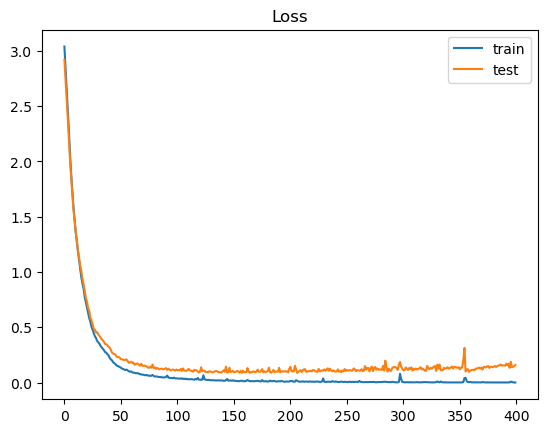

In [22]:
plt.plot(m.history['loss'], label='train')
plt.plot(m.history['val_loss'], label='test')
plt.legend()
plt.title("Loss")
plt.show()

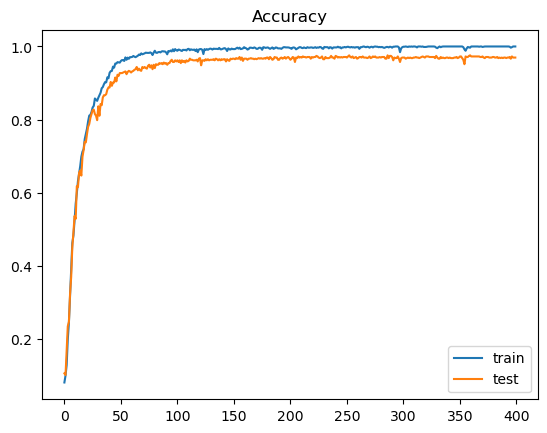

In [23]:
plt.plot(m.history['accuracy'], label='train')
plt.plot(m.history['val_accuracy'], label='test')
plt.legend()
plt.title("Accuracy")
plt.show()

In [24]:
loss , accuracy = model.evaluate(X_test,y_test, verbose=0)
print(f'Loss : {loss}, Accuracy : {accuracy*100}%')

Loss : 0.15846015512943268, Accuracy : 96.96969985961914%


In [31]:
filename = '/Users/divyankshah/Documents/CropRecommendationSystem/savedModel/Crop_Recommendation.pkl'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://f356d153-95f6-41a8-a986-497424955cfc/assets


In [32]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.evaluate(X_test,y_test)
print(result)

21/21 [==============================] - 0s 5ms/step - loss: 0.1585 - accuracy: 0.9697
[0.15846015512943268, 0.9696969985961914]


2022-12-19 10:00:08.615723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
